## CMPE547 - HW
#### a) Visualize this dataset using a scatter plot

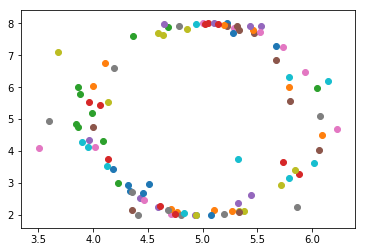

In [1]:
import matplotlib.pyplot as plt

with open('data.txt') as f:
    first_line = f.readline()
    for l in f:
        x1, x2 = (float(s) for s in l.split())
        plt.scatter(x1, x2)
    plt.show()

#### b) Propose a generative model

I propose the model for this data:  
$
\begin{eqnarray}
\sqrt{(x_1-5)^2 + (x_2-5)^2} = 1 \pm \epsilon
\end{eqnarray}
$  
$\epsilon$ is the error that selects the variance of the result and distributed by Gaussian distribution since some sample points are out of the circle with a low chance.  
$
\begin{eqnarray}
\epsilon \sim \mathcal N(x; 0, 1)
\end{eqnarray}
$

#### c) Implement your generative model and sample data from your model

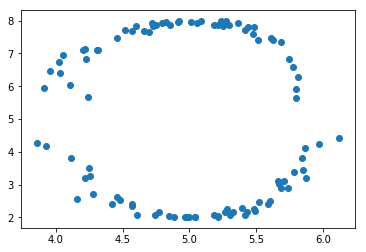

In [59]:
import numpy as np

N = 100
x1 = np.random.uniform(4, 6, N)
eps = np.random.normal(0, 0.1, N)

x2 = np.sqrt(1 - np.square(x1 - 5)) * 3
for i in range(N/2):
    x2[i] *= -1
x2 += 5
x1 += eps  # error
plt.scatter(x1, x2)
plt.show()

#### d) Visualize synthetic data to show that your model generates a 'similar dataset'

$x_2$'s are distributed in the interval (2,8) and do not go out of that internal as it happens in the original dataset.  
Error is added to the result for variance. $x_1$ gets out of the ellipse sometimes, meaning that $x_1$ can be a lower value than 4, and higher value than 6.  
Some points get inside the ellipse since the variance.

#### e) How can you assess if two datasets are similar? Discuss


It can be checked that both plotted dataset form an ellipse of same parameters.  
We can check if the variance is similar to each other by looking points with errors.  
In coding bases, we can check if the ellipses both dataset form, intersect each other at how many points. There are simple algorithms for that purpose. If the count of intersection points are high, then simply, two dataset are more similar.